## Clustering

So far you’ve seen multiple ways of doing supervised learning. In these types of problems, you start with labeled training examples and the goal is to learn from these data to label new data points in the future. However, labeled training data isn’t always available. Labelling large amounts of data ahead of time can be prohibitively expensive/time consuming. In some settings, we may also not know ahead of time what we want to learn from our data. In these situations, we use unsupervised learning.

In unsupervised learning, the input is a set of unlabeled data, and the goal is to uncover some structure from this data. The most common form of unsupervised learning is clustering, a variant of which we will go over today. 

Other examples include dimensionality reduction, in which we start with a datapoint with many dimensions and try to find a lower dimensional representation that retains some aspect of the original data (such as pairwise distance between points).

## K-means Clustering

The goal behind k-means is to find groups in your dataset. This is done by visualizing your data as points in a high dimensional space, and then finding clusters of nearby points in the graph. The input to k means is a set of data points and a number of clusters. Given this input, the goal of k-means is to find the location of clusters and assignment of points to clusters that minimizes the following objective function.

$$RSE\ =\ \sum_{i=1}^kd(Ci\ ,\ xi)^2$$

Where d(x,y) is a standard distance function (such as euclidean). 

Finding the optimal location of clusters is a hard problem. However, the following algorithm finds a decent approximation.

Algorithm:
1. Pick a number k of clusters 
2. Initialize the positions of the clusters at random
3. Assign each point to the cluster closest to it
4. Move each cluster to the midpoint of all points assigned to it
5. Repeat steps 3 and 4 until convergence


In [1]:
import numpy as np
import pandas as pd
import json

from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (8,6)

import netml

import logging
logging.getLogger("scapy.runtime").setLevel(logging.ERROR)

from netml.pparser.parser import PCAP

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [2]:
import matplotlib as mpl

def plot(X,y):
    colors = ['red','orange','green','blue']
    colormap = mpl.colors.ListedColormap(colors)
#    colormap='rgl'
    plt.scatter(*zip(*X), c=y, cmap=colormap)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.show()

### k-Means Clustering: Example

First, perform k-means clustering on a random set of data points below.

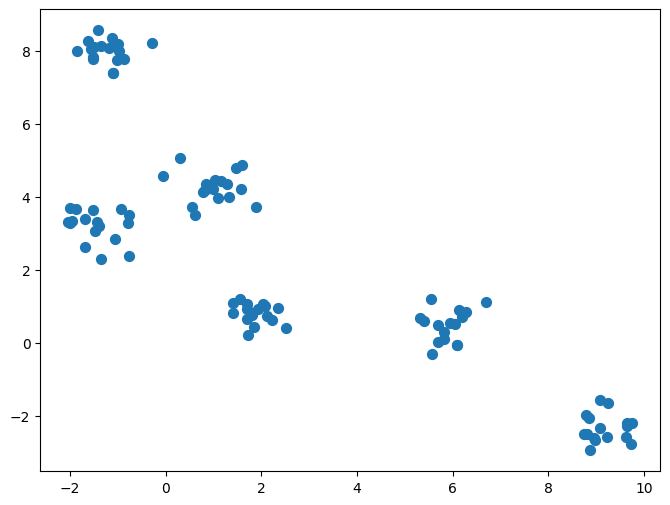

In [3]:
randint = np.random.randint(3, 10)
X, y_true = make_blobs(n_samples=100, centers=randint,cluster_std=0.4, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.show()

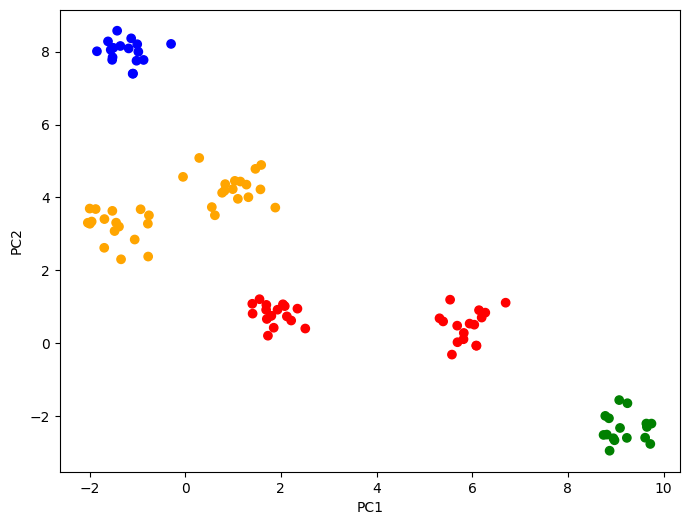

In [4]:
k_means = KMeans(n_clusters=4)
k_means.fit(X)
clusters = k_means.predict(X)
plot(X, clusters)

### Tuning K in K-Means Clustering

One of the challenges for k-means clustering is tuning the value of K. One measure for that is cluster inertia. The example code below plots inertia for different values of K. Given the plot below, you can see what a reasonable value of k would be.

You can play with the points above and the plot below by playing with your dataset.

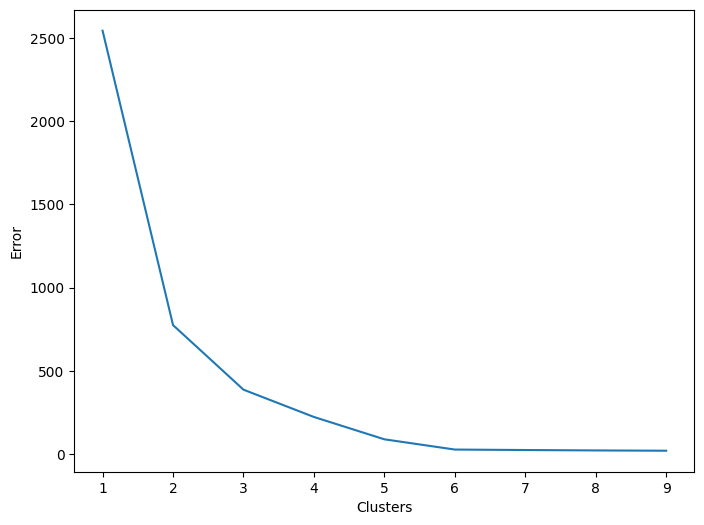

In [5]:
from matplotlib.ticker import MaxNLocator
from matplotlib.pyplot import figure, show

guesses = []
guess_error_rates = []

guess = np.arange(1,10)

# make a k_means variable equal to KMeans with "guess" number of clusters (See above!)
# fit KMeans to the data "X"
for c in guess:
    k_means = KMeans(n_clusters=c)
    k_means.fit(X)

    guesses.append(c)
    guess_error_rates.append(k_means.inertia_)

ax = figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    
plt.plot(guesses, guess_error_rates)
plt.xlabel("Clusters")
plt.ylabel("Error")
plt.show()

### Load Datasets

We will work with both the Web trace and Log4J scan pcaps and attach labels, as before, as well as another dataset for which we have IP geolocation.

In [6]:
hpcap = PCAP('data/http.pcap', flow_ptks_thres=2, verbose=10)
lpcap = PCAP('data/log4j.pcap', flow_ptks_thres=2, verbose=10)

hpcap.pcap2flows()
lpcap.pcap2flows()

# extract features from each flow via STATS
lpcap.flow2features('STATS', fft=False, header=False)
ld = pd.DataFrame(lpcap.features)

# extract features from each flow via STATS
hpcap.flow2features('STATS', fft=False, header=False)
hd = pd.DataFrame(hpcap.features)

'_pcap2flows()' starts at 2022-11-10 17:22:24
pcap_file: data/http.pcap
ith_packets: 0
ith_packets: 10000
ith_packets: 20000
len(flows): 593
total number of flows: 593. Num of flows < 2 pkts: 300, and >=2 pkts: 293 without timeout splitting.
kept flows: 293. Each of them has at least 2 pkts after timeout splitting.
flow_durations.shape: (293, 1)
        col_0
count 293.000
mean   11.629
std    15.820
min     0.000
25%     0.076
50%     0.455
75%    20.097
max    46.235
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   col_0   293 non-null    float64
dtypes: float64(1)
memory usage: 2.4 KB
None
0th_flow: len(pkts): 4
After splitting flows, the number of subflows: 291 and each of them has at least 2 packets.
'_pcap2flows()' ends at 2022-11-10 17:22:29 and takes 0.0857 mins.
'_pcap2flows()' starts at 2022-11-10 17:22:29
pcap_file: data/log4j.pcap
ith_packets

In [7]:
pd.set_option('mode.chained_assignment', None)
hd['label'] = 0
ld['label'] = 1

data = pd.concat([ld,hd])
data

,0,1,2,3,4,5,6,7,8,9,10,11,label
0,5.163,1.162,117.959,101.500,75.859,66.000,66.000,72.000,66.000,271.000,6.000,609.000,1
1,5.163,0.968,119.316,123.200,110.443,66.000,66.000,74.000,66.000,344.000,5.000,616.000,1
2,7.274,0.550,40.690,74.000,0.000,74.000,74.000,74.000,74.000,74.000,4.000,296.000,1
3,17.825,0.561,32.539,58.000,0.000,58.000,58.000,58.000,58.000,58.000,10.000,580.000,1
4,0.000,25653.235,6002857.101,234.000,0.000,234.000,234.000,234.000,234.000,234.000,2.000,468.000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,0.054,334.995,45298.759,135.222,184.344,66.000,66.000,66.000,66.000,719.000,18.000,2434.000,0
287,0.040,895.299,1085500.886,1212.444,544.655,1494.000,1494.000,1494.000,66.000,1494.000,36.000,43648.000,0
288,0.040,124.434,17644.771,141.800,93.034,66.000,74.000,212.000,66.000,291.000,5.000,709.000,0
289,0.146,54.815,33053.585,603.000,612.425,76.500,212.500,1389.000,75.000,1392.000,8.000,4824.000,0


## Dimensionality Reduction for Visualization

Let's plot the data in two dimensions using PCA. This dataset is such that the top two dimensions do capture most of the variance, so not much information is lost with this reduction.

## Clustering

Try to form clusters with the total set of data points with different clustering algorithms. 

### K-Means Clustering

Let's first try K-means, with a default number of clusters as two. 

See what kind of clusters this produces by plotting each cluster as a different color. What do you notice, with regards to the clusters.

### K-Means Failure Scenarios

K-Means has a hard time producing a good clustering of the data. K-Means prefers to choose centroids near the bottom of the graph to minimize the total error. Why?

### Evaluation

In this case, we've used an unsupervised algorithm to compute clusters, but since we know the labels of the original datapoints, we can actually compute how good these clusters with cluster impurity metrics. Compute this metric below.

## Density-Based Clustering

Try clustering with density-based clustering algorithms, such as DBSCAN.

### DBSCAN

## Distribution-Based Clustering

### Gaussian Mixture Models